# Author : Pankaj Chaudhari

### Data Science & Business Analytics inten at TSF

**TASK** : Prediction using Supervised ML Algorithm

**Objective** : Predict the percentage of an student based on the no. of study hours

### Importing required modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Converting Data Set(student_scores.csv) into Data Frame Object

In [2]:
os.listdir(".")

['.ipynb_checkpoints', '.jovianrc', 'student_scores.csv', 'Untitled.ipynb']

In [3]:
file = os.listdir(".")[-2]

In [4]:
file

'student_scores.csv'

In [5]:
student_score_df = pd.read_csv(file) # Converting Data set into Data frame object

In [6]:
student_score_df.head(5) # Analysing the type of Data in the Data Set

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
student_score_df.shape # Check rows and cols in the dataset

(25, 2)

In [8]:
student_score_df.info() # Returns data set info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
student_score_df.describe() # Analyzing statistical info of the data set

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the Data Set

Text(0, 0.5, 'Percentage Scored')

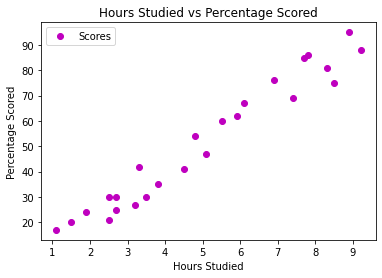

In [10]:
# Plotting Hours vs percentage for analysing distribution of scores
student_score_df.plot(x="Hours",y="Scores",style="o",color='m')
plt.title("Hours Studied vs Percentage Scored")
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Scored")

***Its observable that the relation between hours studied by student is almost linear to the percentage score by him.***

### Linear Regression Model (Preparing data training and testing)

In [11]:
from sklearn.model_selection import train_test_split

X = student_score_df.iloc[:, :-1].values  
y = student_score_df.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42) # Reserving 80% data for traing the model and 20% for testing it. 

### Training the Model by Linear Regression Algorithm (As there are only two variable in the data set)

In [12]:
from sklearn.linear_model import LinearRegression

linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed.")

Training completed.


Text(0, 0.5, 'Percentage Scored')

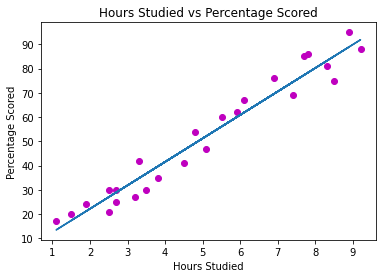

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y,color="m")
plt.plot(X, line);
plt.title("Hours Studied vs Percentage Scored")
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Scored")


### Calculating accuracy of the model for training and test data

In [14]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Training Score
0.9491209376364416


In [15]:
y_predict

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [16]:
y_predict[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

In [17]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [18]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


In [19]:
# lets predict what will the score for 10 hours of study
val =10
print("Student who has studied for {} hours, His expected score can be {} ".format(val,regressor.predict([[10]])))

Student who has studied for 10 hours, His expected score can be [99.6476739] 


### Evaluation Metrics for the model 

In [20]:
# Lets check how efficient the model is
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1404.2200673968694
Mean absolute Error: 33.80918778157651
